In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd

In [2]:
sol = pd.read_csv('D:/python/rdkit/new222.csv')
print(sol.head)

<bound method NDFrame.head of                                          SMILES  \
0                                ClCC(Cl)(Cl)Cl   
1                                  CC(Cl)(Cl)Cl   
2                                ClC(Cl)C(Cl)Cl   
3                                    ClCC(Cl)Cl   
4                           FC(F)(Cl)C(F)(Cl)Cl   
...                                         ...   
2003   O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1   
2004      O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1   
2005                        Cc1ccc(c2ccccc2)cc1   
2006    S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1   
2007  Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1   

      measured log(solubility:mol/L)  
0                           -2.18000  
1                           -2.00000  
2                           -1.74000  
3                           -1.48000  
4                           -3.04000  
...                              ...  
2003                        -1.46000  
2004                        -2.15490  
2005  

In [3]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                          SMILES  \
0                                ClCC(Cl)(Cl)Cl   
1                                  CC(Cl)(Cl)Cl   
2                                ClC(Cl)C(Cl)Cl   
3                                    ClCC(Cl)Cl   
4                           FC(F)(Cl)C(F)(Cl)Cl   
...                                         ...   
2003   O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1   
2004      O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1   
2005                        Cc1ccc(c2ccccc2)cc1   
2006    S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1   
2007  Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1   

      measured log(solubility:mol/L)  
0                           -2.18000  
1                           -2.00000  
2                           -1.74000  
3                           -1.48000  
4                           -3.04000  
...                              ...  
2003                        -1.46000  
2004                        -2.15490  
2005  

In [4]:
#descriptor
molecules = sol.SMILES.apply(Chem.MolFromSmiles)

In [5]:
sol.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
sol.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
sol.loc[:, 'HAccept'] = molecules.apply(Descriptors.NumHAcceptors)
sol.loc[:, 'Heteroatoms'] = molecules.apply(Descriptors.NumHeteroatoms)
sol.loc[:, 'HDonor'] = molecules.apply(Descriptors.NumHDonors)
sol.loc[:, 'MolWt'] = molecules.apply(Descriptors.MolWt)
sol.loc[:, 'RotableBonds'] = molecules.apply(Descriptors.NumRotatableBonds)
sol.loc[:, 'RingCount'] = molecules.apply(Descriptors.RingCount)
sol.loc[:, 'Ipc'] = molecules.apply(Descriptors.Ipc)
sol.loc[:, 'HallKierAlpha'] = molecules.apply(Descriptors.HallKierAlpha)
sol.loc[:, 'NumValenceElectrons'] = molecules.apply(Descriptors.NumValenceElectrons)
sol.loc[:, 'SaturatedRings'] = molecules.apply(Descriptors.NumSaturatedRings)
sol.loc[:, 'AliphaticRings'] = molecules.apply(Descriptors.NumAliphaticRings)
sol.loc[:, 'AromaticRings'] = molecules.apply(Descriptors.NumAromaticRings)
sol.loc[:, 'Total Polar Surface Area'] = molecules.apply(Descriptors.TPSA)
sol.loc[:, 'Labutes Approximate Surface Area'] = molecules.apply(Descriptors.LabuteASA)

In [7]:
sol.head()

,SMILES,measured log(solubility:mol/L),MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,ClCC(Cl)(Cl)Cl,-2.18,2.5954,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.0,56.317258
1,CC(Cl)(Cl)Cl,-2.00,2.3765,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.0,46.013992
2,ClC(Cl)C(Cl)Cl,-1.74,2.5938,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.0,56.317258
3,ClCC(Cl)Cl,-1.48,2.0289,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.0,46.013992
4,FC(F)(Cl)C(F)(Cl)Cl,-3.04,2.9189,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.0,58.510598


In [8]:
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [9]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [10]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]

In [11]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]

In [12]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]

In [13]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
#df_desc_AromaticProportion

In [14]:
df=sol.iloc[:,2:]
df

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258
1,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992
2,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258
3,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992
4,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530
2004,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625
2005,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439
2006,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297


In [15]:
heatmap = pd.concat([sol,df_desc_AromaticProportion], axis=1)
heatmap

,SMILES,measured log(solubility:mol/L),MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,ClCC(Cl)(Cl)Cl,-2.18000,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258,0.000000
1,CC(Cl)(Cl)Cl,-2.00000,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992,0.000000
2,ClC(Cl)C(Cl)Cl,-1.74000,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258,0.000000
3,ClCC(Cl)Cl,-1.48000,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992,0.000000
4,FC(F)(Cl)C(F)(Cl)Cl,-3.04000,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1,-1.46000,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530,0.428571
2004,O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1,-2.15490,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625,0.315789
2005,Cc1ccc(c2ccccc2)cc1,-4.62000,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439,0.923077
2006,S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1,-2.96000,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297,0.571429


In [16]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258,0.000000
1,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992,0.000000
2,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258,0.000000
3,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992,0.000000
4,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530,0.428571
2004,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625,0.315789
2005,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439,0.923077
2006,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297,0.571429


In [17]:
Y = sol.iloc[:,1]
Y

0      -2.18000
1      -2.00000
2      -1.74000
3      -1.48000
4      -3.04000
         ...   
2003   -1.46000
2004   -2.15490
2005   -4.62000
2006   -2.96000
2007   -3.80528
Name: measured log(solubility:mol/L), Length: 2008, dtype: float64

In [18]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=338)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [20]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))



Mean squared error (RMSE): 0.26
Coefficient of determination (R^2): 0.99


In [21]:
#predicts the X_test
Y_pred_test = model.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.60
Coefficient of determination (R^2): 0.93


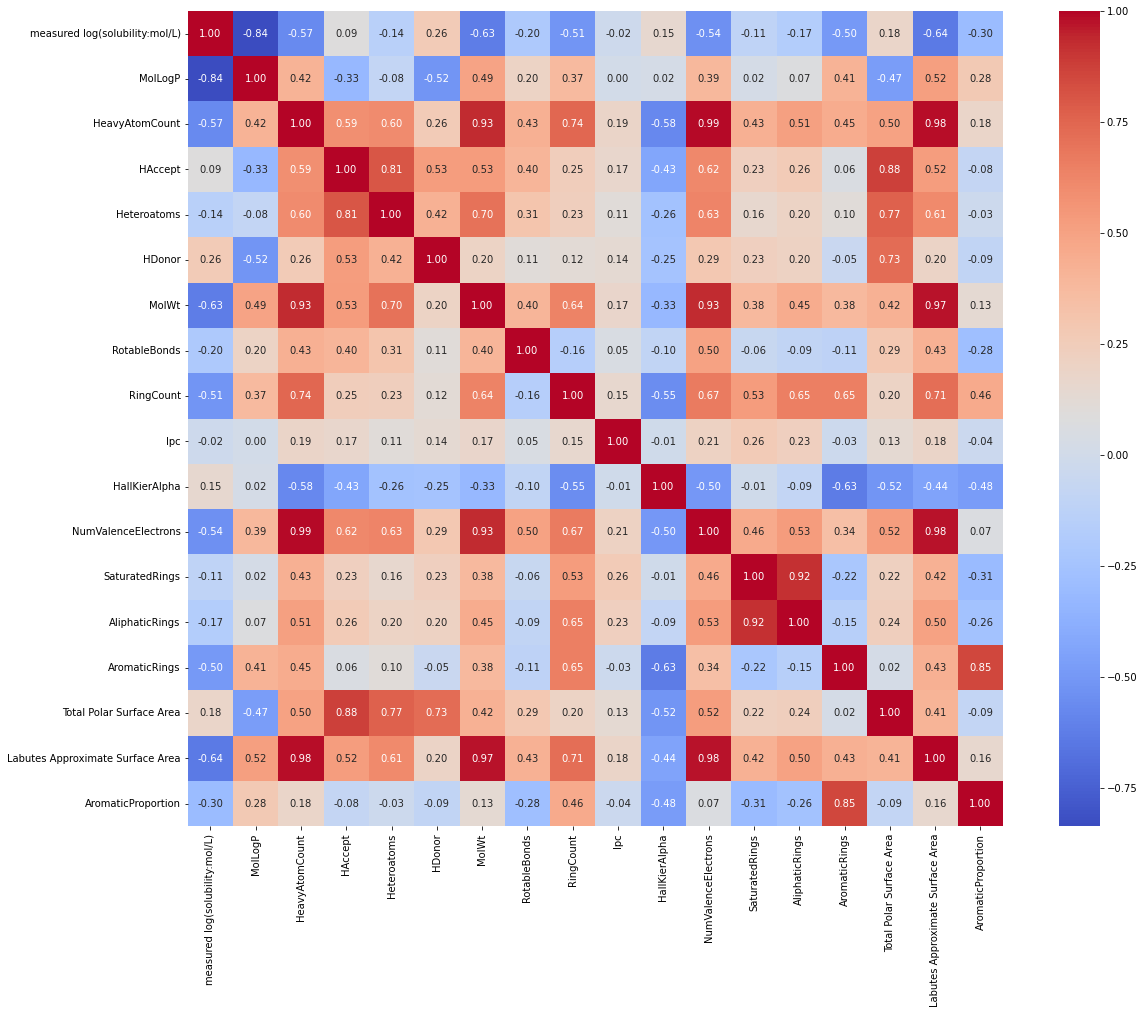

In [22]:
plt.figure()
sns.heatmap(heatmap.corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm')

fig = plt.gcf()

fig.set_size_inches(20, 15)
#corr = np.corrcoef(np.random.randn(10, 200))
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
 #   f, ax = plt.subplots(figsize=(7, 5))
  #  ax = sns.heatmap(sol, mask=mask, vmax=.3, square=True)
#plt.dpi=1200
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#	label.set_fontsize(16)
plt.savefig('papersolubility.pdf',bbox_inches='tight',dpi = 1000)

plt.show()



In [ ]:
pip install shap

In [23]:
import shap

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [25]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

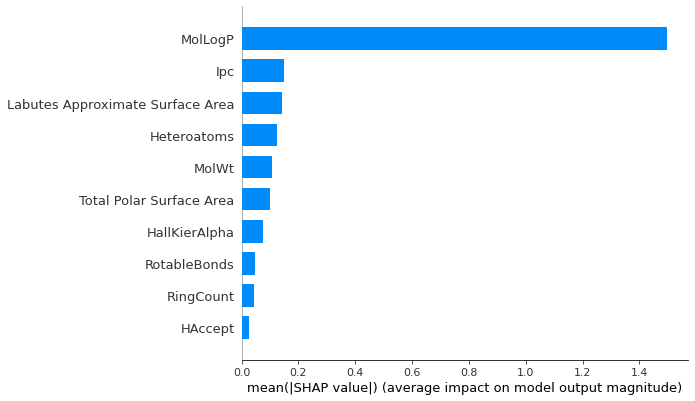

In [26]:
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,max_display=10,plot_size=0.5)

#plot_size=(18.0, 10.0)
plt.savefig('scratch.pdf',bbox_inches='tight',dpi = 1000)

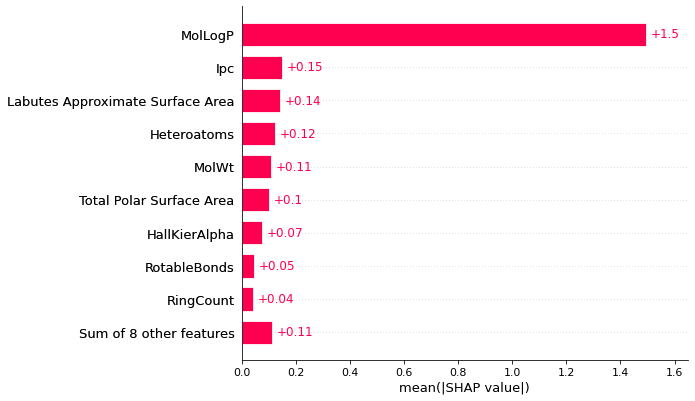

In [27]:
shap.plots.bar(shap_values, max_display=10,show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

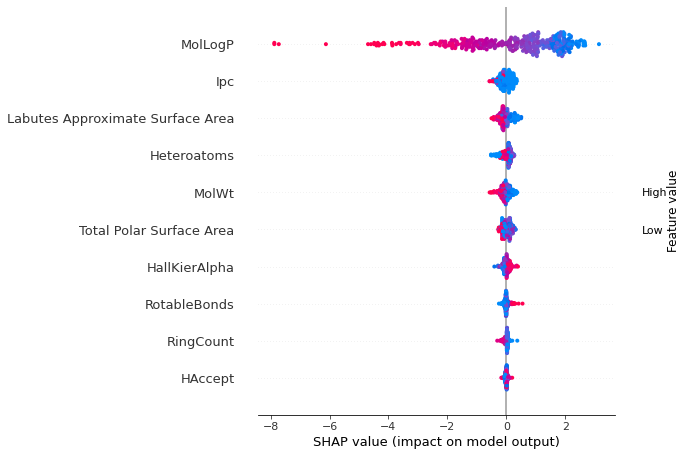

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="dot", plot_size=0.6, show=False,max_display=10)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

Feature: 0, Score: 0.76937
Feature: 1, Score: 0.00379
Feature: 2, Score: 0.00649
Feature: 3, Score: 0.01991
Feature: 4, Score: 0.00480
Feature: 5, Score: 0.03003
Feature: 6, Score: 0.01196
Feature: 7, Score: 0.00663
Feature: 8, Score: 0.04315
Feature: 9, Score: 0.02023
Feature: 10, Score: 0.00591
Feature: 11, Score: 0.00182
Feature: 12, Score: 0.00195
Feature: 13, Score: 0.00243
Feature: 14, Score: 0.02421
Feature: 15, Score: 0.03927
Feature: 16, Score: 0.00804


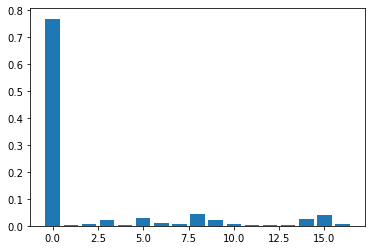

In [30]:
import pandas as pd
from matplotlib import pyplot

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

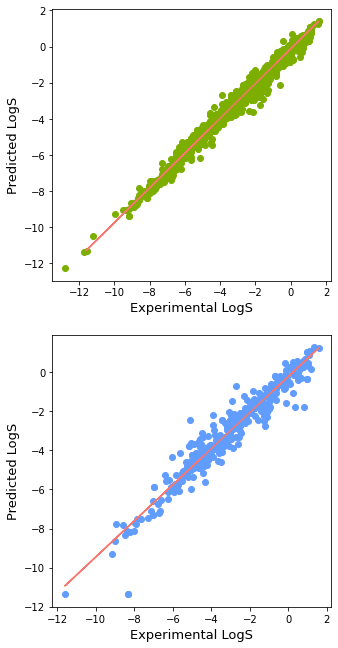

In [32]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS', fontsize=13)
plt.ylabel('Predicted LogS', fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS', fontsize=13)
plt.xlabel('Experimental LogS', fontsize=13)

plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS descriptor.pdf',dpi=1200)
plt.show()

In [33]:
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload.csv')
testdata

,Substance,SMILES,rdkit,morgan,descriptor
0,atropine,CN1[C@H]2CC[C@@H]1C[C@@H](C2)OC(=O)C(CO)C1=CC=...,-2.14,-1.90,-2.20
1,carvedilol,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,-4.28,-4.27,-4.07
2,chlorpropamide,Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1,-3.33,-3.53,-3.00
3,enrofloxacin,CCN1CCN(CC1)c1c(cc2c(n(cc(C(=O)O)c2=O)C2CC2)c1)F,-3.27,-3.34,-3.37
4,metronidazole,OCCn1c(ncc1N(=O)=O)C,-1.22,-1.25,-1.24
5,nalidixic_acid,CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O,-3.41,-3.52,-3.20
6,nitrofurantoin,O=C1NC(CN1\N=C\c1ccc(N(=O)=O)o1)=O,-3.18,-3.13,-3.18
7,sulfamethazine,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1,-2.75,-2.55,-2.51
8,thymol,c1(cc(ccc1C(C)C)C)O,-2.46,-2.08,-2.23
9,trichloromethiazide_form_I,NS(=O)(=O)c1cc2c(NC(NS2(=O)=O)C(Cl)Cl)cc1Cl,-3.09,-3.27,-2.84


In [34]:
moleculestest = testdata.SMILES.apply(Chem.MolFromSmiles)

In [35]:
testdata.loc[:, 'MolLogP'] = moleculestest.apply(Descriptors.MolLogP)
testdata.loc[:, 'HeavyAtomCount'] = moleculestest.apply(Descriptors.HeavyAtomCount)
testdata.loc[:, 'HAccept'] = moleculestest.apply(Descriptors.NumHAcceptors)
testdata.loc[:, 'Heteroatoms'] = moleculestest.apply(Descriptors.NumHeteroatoms)
testdata.loc[:, 'HDonor'] = moleculestest.apply(Descriptors.NumHDonors)
testdata.loc[:, 'MolWt'] = moleculestest.apply(Descriptors.MolWt)
testdata.loc[:, 'RotableBonds'] = moleculestest.apply(Descriptors.NumRotatableBonds)
testdata.loc[:, 'RingCount'] = moleculestest.apply(Descriptors.RingCount)
testdata.loc[:, 'Ipc'] = moleculestest.apply(Descriptors.Ipc)
testdata.loc[:, 'HallKierAlpha'] = moleculestest.apply(Descriptors.HallKierAlpha)
testdata.loc[:, 'NumValenceElectrons'] = moleculestest.apply(Descriptors.NumValenceElectrons)
testdata.loc[:, 'SaturatedRings'] = moleculestest.apply(Descriptors.NumSaturatedRings)
testdata.loc[:, 'AliphaticRings'] = moleculestest.apply(Descriptors.NumAliphaticRings)
testdata.loc[:, 'AromaticRings'] = moleculestest.apply(Descriptors.NumAromaticRings)
testdata.loc[:, 'Total Polar Surface Area'] = moleculestest.apply(Descriptors.TPSA)
testdata.loc[:, 'Labutes Approximate Surface Area'] = moleculestest.apply(Descriptors.LabuteASA)

In [36]:
testdata.head()

,Substance,SMILES,rdkit,morgan,descriptor,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,...,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,atropine,CN1[C@H]2CC[C@@H]1C[C@@H](C2)OC(=O)C(CO)C1=CC=...,-2.14,-1.90,-2.20,1.93090,21,4,4,1,...,4,3,8.605957e+04,-1.39,114,2,2,1,49.77,125.263239
1,carvedilol,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,-4.28,-4.27,-4.07,3.73800,30,5,6,3,...,10,4,1.133734e+07,-3.22,156,0,0,4,75.74,174.935371
2,chlorpropamide,Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1,-3.33,-3.53,-3.00,1.73790,17,3,7,2,...,4,1,4.729002e+03,-1.27,94,0,0,1,75.27,105.216460
3,enrofloxacin,CCN1CCN(CC1)c1c(cc2c(n(cc(C(=O)O)c2=O)C2CC2)c1)F,-3.27,-3.34,-3.37,2.31560,26,5,7,1,...,4,4,1.655411e+06,-2.41,138,2,2,2,65.78,149.982927
4,metronidazole,OCCn1c(ncc1N(=O)=O)C,-1.22,-1.25,-1.24,0.09202,12,5,6,1,...,3,1,5.635353e+02,-1.43,66,0,0,1,81.19,68.612219


In [37]:
mol_list2= []
for element in testdata.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list2.append(mol)

In [38]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [39]:
desc_AromaticAtoms2 = [AromaticAtoms(element) for element in mol_list2]
#desc_AromaticAtoms2

In [40]:
desc_HeavyAtomCount2 = [Descriptors.HeavyAtomCount(element) for element in mol_list2]
#desc_HeavyAtomCount2

In [41]:
desc_AromaticProportion2 = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list2]
#desc_AromaticProportion2

In [42]:
df_desc_AromaticProportion2 = pd.DataFrame(desc_AromaticProportion2, columns=['AromaticProportion'])
df_desc_AromaticProportion2

,AromaticProportion
0,0.285714
1,0.633333
2,0.352941
3,0.384615
4,0.416667
5,0.588235
6,0.294118
7,0.631579
8,0.545455
9,0.300000


In [44]:
dt=testdata.iloc[:,5:]
dt

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,1.93090,21,4,4,1,289.375,4,3,8.605957e+04,-1.39,114,2,2,1,49.77,125.263239
1,3.73800,30,5,6,3,406.482,10,4,1.133734e+07,-3.22,156,0,0,4,75.74,174.935371
2,1.73790,17,3,7,2,276.745,4,1,4.729002e+03,-1.27,94,0,0,1,75.27,105.216460
3,2.31560,26,5,7,1,359.401,4,4,1.655411e+06,-2.41,138,2,2,2,65.78,149.982927
4,0.09202,12,5,6,1,171.156,3,1,5.635353e+02,-1.43,66,0,0,1,81.19,68.612219
5,1.42302,17,4,5,1,232.239,2,2,6.765607e+03,-2.17,88,0,0,2,72.19,97.339382
6,0.07350,17,6,9,1,238.159,3,2,9.165913e+03,-2.71,88,1,1,1,118.05,93.830844
7,1.47644,19,5,7,2,278.337,3,2,1.422835e+04,-2.15,100,0,0,2,97.97,111.308206
8,2.82402,11,1,1,1,150.221,1,1,2.521074e+02,-0.98,60,0,0,1,20.23,67.685405
9,0.82100,20,5,12,3,380.662,2,2,1.532857e+04,-0.29,112,0,1,1,118.36,130.026422


In [45]:

dtnew = pd.concat([dt,df_desc_AromaticProportion2], axis=1)
dtnew

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,1.93090,21,4,4,1,289.375,4,3,8.605957e+04,-1.39,114,2,2,1,49.77,125.263239,0.285714
1,3.73800,30,5,6,3,406.482,10,4,1.133734e+07,-3.22,156,0,0,4,75.74,174.935371,0.633333
2,1.73790,17,3,7,2,276.745,4,1,4.729002e+03,-1.27,94,0,0,1,75.27,105.216460,0.352941
3,2.31560,26,5,7,1,359.401,4,4,1.655411e+06,-2.41,138,2,2,2,65.78,149.982927,0.384615
4,0.09202,12,5,6,1,171.156,3,1,5.635353e+02,-1.43,66,0,0,1,81.19,68.612219,0.416667
5,1.42302,17,4,5,1,232.239,2,2,6.765607e+03,-2.17,88,0,0,2,72.19,97.339382,0.588235
6,0.07350,17,6,9,1,238.159,3,2,9.165913e+03,-2.71,88,1,1,1,118.05,93.830844,0.294118
7,1.47644,19,5,7,2,278.337,3,2,1.422835e+04,-2.15,100,0,0,2,97.97,111.308206,0.631579
8,2.82402,11,1,1,1,150.221,1,1,2.521074e+02,-0.98,60,0,0,1,20.23,67.685405,0.545455
9,0.82100,20,5,12,3,380.662,2,2,1.532857e+04,-0.29,112,0,1,1,118.36,130.026422,0.300000


In [46]:

# make a prediction
Xnew=dtnew
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.19982243, -4.06589893, -3.0005166 , -3.37427659, -1.24332079,
       -3.2019635 , -3.17675017, -2.5050556 , -2.22627   , -2.83892097])